In [54]:
import sys
sys.path.insert(0,'../sib/')
from matplotlib import cm

from time import time
import numpy as np
import pandas as pd
import os.path
from os import path
from scenario import Scenario
from sir_model import EpidemicModel, patient_zeros_states, symptomatic_individuals
# SIR parameters
location="networks"
N=500000
## new try with 100 spreaders
#N_patient_zero = 200;
N_patient_zero = 200;

lamb = 0.05;
mu = 0.02;

###
scale=1.0; # Easy Case
T=100;
t1 = 10;
# trac parameters
trac_tau = 5;
# MF parameters
MF_taus = [5];
MF_deltas = [15];
# observation parameters
n_rankings = [1500]#, 100, 150, 200]
#seeds=[2]
#n_rankings = [150]
seeds=range(1,5)
#seed = int(sys.argv[2]);
#seeds for running [32,123,456]
#seed=int(sys.argv[1]);
################################################
n_ranking = n_rankings[0]
MF_tau = MF_taus[0];
MF_delta = MF_deltas[0];

scenario_tracs = {}
scenario_tracs2nd = {}
scenario_MFs = {}
scenario_BPs = {}

pos_ranked = dict()
inf_cont = dict()

alg_all = {"tracing", "greedy2", "MF", "BP"}

for alg in alg_all:
    pos_ranked[alg] = np.zeros(90,)
    inf_cont[alg] = np.zeros(90,)
for seed in seeds:
    scenario_tracs = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac_t%d_info/info.csv"%(N/1000,T,
                                                            t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep=r'\s*,\s*')
    scenario_tracs[scenario_tracs['t'] < 5] = 0
    pos_ranked["tracing"] += scenario_tracs["pos_ranked"].to_numpy()
    inf_cont["tracing"] += scenario_tracs["inf_cont"].to_numpy()
    scenario_tracs2nd = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac2nd_t%d_info/info.csv"%(N/1000,
                                            T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep=r'\s*,\s*')
    scenario_tracs2nd[scenario_tracs2nd['t'] < 5] = 0

    pos_ranked["greedy2"] += scenario_tracs2nd["pos_ranked"].to_numpy()
    inf_cont["greedy2"] += scenario_tracs2nd["inf_cont"].to_numpy()
    scenario_MFs = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_MF_t%d_d%d_info/info.csv"%(N/1000,T,t1,
                                    N_patient_zero,mu,lamb,seed,n_ranking,MF_tau,MF_delta), sep=r'\s*,\s*')
    scenario_MFs[scenario_MFs['t'] < 5] = 0
    pos_ranked["MF"] += scenario_MFs["pos_ranked"].to_numpy()
    inf_cont["MF"] += scenario_MFs["inf_cont"].to_numpy()
    scenario_BPs = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp_info/info.csv"%(N/1000,T,
                                                t1,N_patient_zero,mu,lamb,seed,n_ranking),sep=r'\s*,\s*')
    
    scenario_BPs[scenario_BPs['t'] < 5] = 0
    pos_ranked["BP"] += scenario_BPs["pos_ranked"].to_numpy()
    inf_cont["BP"] += scenario_BPs["inf_cont"].to_numpy()

for alg in alg_all:
    pos_ranked[alg] /= len(seeds)
    inf_cont[alg] /= len(seeds)

/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/ipykernel_launcher.py:59: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/ipykernel_launcher.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/ipykernel_launcher.py:70: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyth

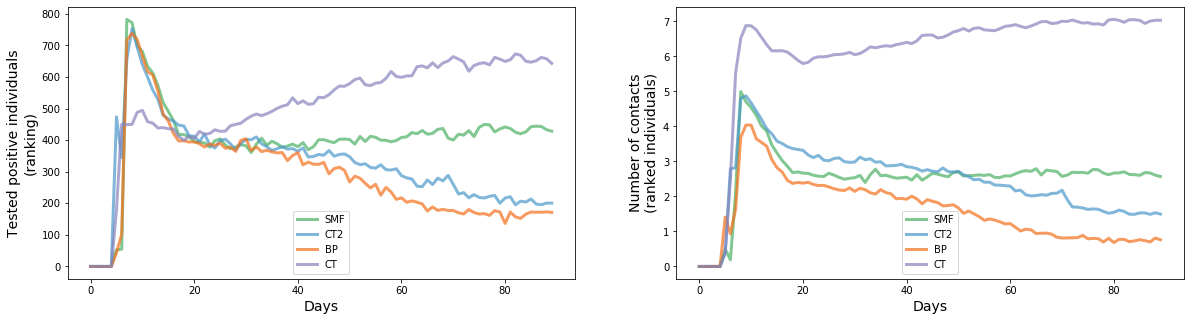

In [55]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
types = {'random':'Greys','tracing':'Purples', 'greedy2':'Blues', 'MF':'Greens', \
         'BP':'Oranges'}
labels = {'tracing':'CT', 'MF':'SMF','BP':'BP','greedy2':'CT2'}
alpha = 0.2
alpha1 = 1
alpham = 0.7

for alg in alg_all:
    cmap = cm.get_cmap(types[alg])
    axs[0].plot(pos_ranked[alg], color=cmap(0.6), alpha = alpham, label = labels[alg], linewidth = 3.0)
    axs[1].plot(inf_cont[alg], color=cmap(0.6), alpha = alpham, label = labels[alg], linewidth = 3.0)

axs[0].set_xlabel("Days", fontsize=14)
axs[1].set_xlabel("Days", fontsize=14)
axs[0].set_ylabel("Tested positive individuals\n(ranking)", fontsize = 14)
axs[1].set_ylabel("Number of contacts\n(ranked individuals)", fontsize = 14)
axs[0].legend()
axs[1].legend()

fig.savefig("500k_proximity_%dseeds_l%.2f_m%.2f_info.png"%(len(seeds),lamb,mu))

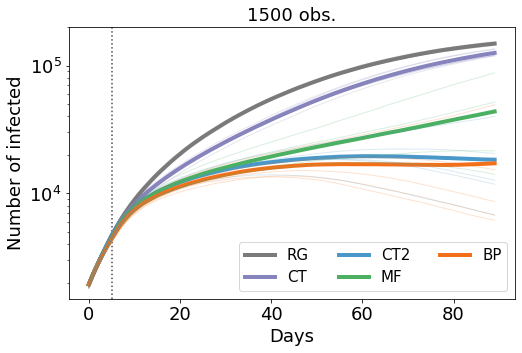

In [56]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
types = {'random':'Greys','tracing':'Purples', 'greedy2':'Blues', 'MF':'Greens', \
         'BP':'Oranges'}


alpha = 0.2
alpha1 = 1
alpham = 0.7
cmap = cm.get_cmap(types["random"])
ax = scenario_rnd[["I"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                      color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["tracing"])
ax = scenario_trac[["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                       color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["greedy2"])
ax = scenario_trac2nd[["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac2", 
                                                       color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["MF"])
ax = scenario_MF[["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                     color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["BP"])
ax = scenario_BP[["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                     color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)

for seed in seeds:
    cmap = cm.get_cmap(types["random"])
    ax = scenario_rnds[seed][["I"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                          color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["tracing"])
    ax = scenario_tracs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                           color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["greedy2"])
    ax = scenario_tracs2nd[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac2", 
                                                           color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["MF"])
    ax = scenario_MFs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                         color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["BP"])
    ax = scenario_BPs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                         color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
ax.vlines(5, 1.5e3, 2e5, linestyle=":", color="Black", alpha=alpham)
ax.legend(["RG", "CT", "CT2", "MF", "BP"], ncol = 3, fontsize= 15);
ax.set_ylabel("Number of infected", fontsize = 18)
ax.set_xlabel("Days", fontsize = 18)
ax.set_title("1500 obs.", fontsize = 18)
ax.set_yscale('log')
ax.tick_params(labelsize = 18)
plt.ylim(1.5e3,2e5)

fig.savefig("500k_proximity_%dseeds_l%.2f_m%.2f.png"%(len(seeds),lamb,mu))

/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


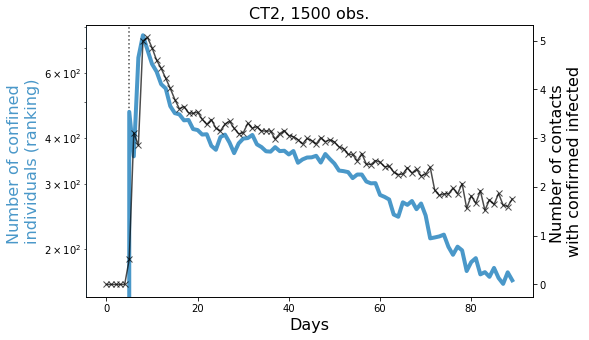

In [62]:
#import matplotlib.pyplot as plt
#fig,ax = plt.subplots()
#ax.plot(n_rank, color="Blue", marker="o")
#ax.set_ylabel("Mean number of confined individuals (ranking)")
#ax.set_xlabel("Days")

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
types = {'random':'Greys','tracing':'Purples', 'greedy2':'Blues', 'MF':'Greens', \
         'BP':'Oranges'}


alpha = 0.2
alpha1 = 1
alpham = 0.7

cmap = cm.get_cmap(types["greedy2"])
ax.plot(n_rank, label="scenario_trac", color=cmap(0.6), alpha = alpha1, linewidth = 4.0)
ax.vlines(5, min(n_rank), max(n_rank)+50, linestyle=":", color="Black", alpha=alpham)
ax.set_ylabel("Number of confined \nindividuals (ranking)", fontsize = 16)
ax.set_xlabel("Days", fontsize = 16)
ax.set_title("CT2, 1500 obs.", fontsize = 16)
ax.set_yscale('log')
ax.spines['left'].set_color(cmap(0.6))
ax.yaxis.label.set_color(cmap(0.6))
#ax.tick_params(axis='y', color=cmap(0.6),labelsize = 16)
plt.ylim(min(n_rank), max(n_rank)+50)


ax2 = ax.twinx()
ax2.plot(n_count, color="Black", marker="x", alpha = alpham)
ax2.set_ylabel("Number of contacts \nwith confirmed infected", fontsize = 16)
plt.show()

fig.savefig("500k_proximity_quar_%dseeds_l%.2f_m%.2f.png"%(len(seeds),lamb,mu),bbox_inches="tight")



In [56]:
scenario_BPs[seed]


,S,I,R,q,free_birds
0,497821,2036,143,9,2027
1,497345,2481,174,24,2457
2,496816,2949,235,329,2621
3,496232,3465,303,543,2929
4,495624,4007,369,631,3392
...,...,...,...,...,...
85,458751,16189,25060,36780,477
86,458649,15957,25394,36933,417
87,458560,15753,25687,37098,332
88,458497,15513,25990,37217,266
